In [ ]:
# Loadiing Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Adding Google Drive path
import sys
sys.path.append('/content/drive/My Drive/')

Mounted at /content/drive


In [ ]:
# Importing basic libraries
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

import random
np.random.seed(47)
import time
import h5py
import models_2

In [ ]:
class preprocessUtil:

  @staticmethod
  def batch_norm(arr):
    if np.max(arr)==1:
        return arr
    return arr/np.max(arr)
  
  @staticmethod
  def drawOnto(image, label):
    return preprocessUtil.batch_norm(image)+preprocessUtil.batch_norm(label)


In [ ]:
# Dataset Loader https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
from matplotlib import cm

class BrainTumorDataset(torch.utils.data.Dataset):
    def __init__(self, X_path, transform_X, transform_y):
        """
            X_path: List of X_paths
            Transform: X Transforms
        """

        self.TRAIN_VALID_TEST = (90,5,5)

        self.X_path = X_path
        self.train_paths = []
        self.valid_paths = []
        self.test_paths = []

        for path in X_path:
          paths = os.listdir(path)
          paths = [path+pth for pth in paths]
          np.random.shuffle(paths)
          train_length = self.TRAIN_VALID_TEST[0]*len(paths)//100
          test_length = self.TRAIN_VALID_TEST[1]*len(paths)//100
          valid_length = self.TRAIN_VALID_TEST[2]*len(paths)//100
          self.train_paths.extend(paths[:train_length])
          self.valid_paths.append(paths[train_length:-test_length])
          self.test_paths.append(paths[-test_length:])
          

        self.transform_X = transform_X
        self.transform_y = transform_y

        #self.X_paths = self.X_paths[:50]
        #self.y_paths = self.y_paths[:50]

        self.TRAIN_LENGTH = len(self.train_paths)
        self.VALID_LENGTHS = [len(path) for path in self.valid_paths]
        self.TEST_LENGTHS = [len(path) for path in self.test_paths]

    def __len__(self):
        return self.TRAIN_LENGTH

    def __getitem__(self, idx):
      dic = {}
      with h5py.File(self.train_paths[idx], 'r') as f:
        f = f["cjdata"]
        for k, v in f.items():
          dic[k] = np.array(v)
          
        if dic["image"].shape != (512,512):
            img = Image.fromarray(dic["image"], 'L')
            img = img.resize((512,512))
            dic["image"] = np.array(img)
            img = Image.fromarray(dic["label"], 'L')
            img = img.resize((512,512))
            dic["label"] = np.array(img)
            img = Image.fromarray(dic["tumorMask"], 'L')
            img = img.resize((512,512))
            dic["tumorMask"] = np.array(img)
        sample = {'image': preprocessUtil.batch_norm(dic["image"]), 'labels': preprocessUtil.batch_norm(dic["tumorMask"]), 'id': dic["label"]}
        return sample

    def test_item(self, id, idx):
      dic = {}
      with h5py.File(self.test_paths[id][idx], 'r') as f:
        f = f["cjdata"]
        for k, v in f.items():
          dic[k] = np.array(v)
        if dic["image"].shape != (512,512):
            img = Image.fromarray(dic["image"], 'L')
            img = img.resize((512,512))
            dic["image"] = np.array(img)
            img = Image.fromarray(dic["label"], 'L')
            img = img.resize((512,512))
            dic["label"] = np.array(img)
            img = Image.fromarray(dic["tumorMask"], 'L')
            img = img.resize((512,512))
            dic["tumorMask"] = np.array(img)
    
    def valid_item(self, id, idx):
      dic = {}
      with h5py.File(self.valid_paths[id][idx], 'r') as f:
        f = f["cjdata"]
        for k, v in f.items():
          dic[k] = np.array(v)
        if dic["image"].shape != (512,512):
            img = Image.fromarray(dic["image"], 'L')
            img = img.resize((512,512))
            dic["image"] = np.array(img)
            img = Image.fromarray(dic["label"], 'L')
            img = img.resize((512,512))
            dic["label"] = np.array(img)
            img = Image.fromarray(dic["tumorMask"], 'L')
            img = img.resize((512,512))
            dic["tumorMask"] = np.array(img)


        sample = {'image': preprocessUtil.batch_norm(dic["image"]), 'labels': preprocessUtil.batch_norm(dic["tumorMask"]), 'id': dic["label"]}
        return sample

In [ ]:
X_path = ['/content/drive/My Drive/Brain_Dataset/linki/1/', '/content/drive/My Drive/Brain_Dataset/linki/2/', '/content/drive/My Drive/Brain_Dataset/linki/3/']

# Transforms https://pytorch.org/docs/stable/torchvision/transforms.html
transform_X = transforms.Compose([
     transforms.ToTensor()])

transform_y = transforms.Compose([
     transforms.ToTensor()])

BrainTrainSet = BrainTumorDataset(X_path, transform_X, transform_y)

# NOTE: Keeping batch_size = 2 due to colab RAM limit
BrainTrainLoader = torch.utils.data.DataLoader(BrainTrainSet,batch_size=2,shuffle=True, num_workers=2)

In [ ]:
try:
  for i, data in enumerate(BrainTrainLoader):
    pass
except:
  print(i, data)

118 {'image': tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0011, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
       dtype=torch.float64), 'labels': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 

In [ ]:
data["image"].shape

torch.Size([2, 512, 512])

In [ ]:
BrainTrainLoader.__len__()

1379

In [ ]:
BrainTrainSet.__len__()

2757

In [ ]:
dic = BrainTrainSet[5]

In [ ]:
print(BrainTrainSet.__len__())
np.array(BrainTrainSet[5]["labels"]).shape

3064


(512, 512)

In [ ]:
dic.keys()

dict_keys(['image', 'labels', 'id'])

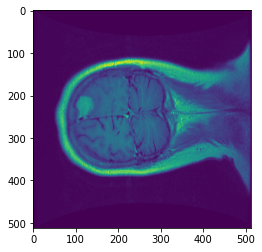

In [ ]:
plt.imshow(dic["image"])

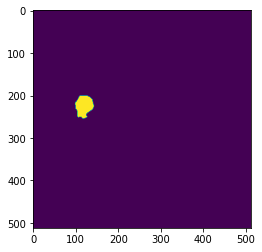

In [ ]:
plt.imshow(dic["labels"])

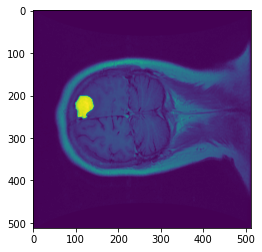

In [ ]:
plt.imshow(preprocessUtil.drawOnto(dic["image"], dic["labels"]))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#Unet_Model
# import torch
# import torch.nn as nn
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)

class DownBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownBlock, self).__init__()
        self.double_conv = DoubleConv(in_channels, out_channels)
        self.down_sample = nn.MaxPool2d(2)

    def forward(self, x):
        skip_out = self.double_conv(x)
        down_out = self.down_sample(skip_out)
        return (down_out, skip_out)

class UpBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpBlock, self).__init__()
        self.up_sample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.double_conv = DoubleConv(in_channels, out_channels)

    def forward(self, down_input, skip_input):
        x = self.up_sample(down_input)
        x = torch.cat([x, skip_input], dim=1)
        return self.double_conv(x)


class UNet(nn.Module):
    def __init__(self, out_classes=1):
        super(UNet, self).__init__()

        self.down_conv1 = DownBlock(1, 64)
        self.down_conv2 = DownBlock(64, 128)
        self.down_conv3 = DownBlock(128, 256)
        self.down_conv4 = DownBlock(256, 512)

        self.double_conv = DoubleConv(512, 1024)

        self.up_conv4 = UpBlock(512 + 1024, 512)
        self.up_conv3 = UpBlock(256 + 512, 256)
        self.up_conv2 = UpBlock(128 + 256, 128)
        self.up_conv1 = UpBlock(128 + 64, 64)

        self.conv_last = nn.Conv2d(64, out_classes, kernel_size=1)

    def forward(self, x):
        x, skip1_out = self.down_conv1(x)
        x, skip2_out = self.down_conv2(x)
        x, skip3_out = self.down_conv3(x)
        x, skip4_out = self.down_conv4(x)
        x = self.double_conv(x)
        x = self.up_conv4(x, skip4_out)
        x = self.up_conv3(x, skip3_out)
        x = self.up_conv2(x, skip2_out)
        x = self.up_conv1(x, skip1_out)
        x = self.conv_last(x)
        return x

model = UNet().to(device)


In [ ]:
model = UNet().to(device) #### Model instance

class dice_loss(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(pred, target, epsilon=1e-7, use_sigmoid=True):
      pred = pred.contiguous()
      if use_sigmoid:
          pred = torch.sigmoid(pred)
      target = target.contiguous()
      intersection = (pred * target).sum(dim=2).sum(dim=2)
      loss = (1 - ((2. * intersection + epsilon) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + epsilon)))
      return loss.mean()

criterion = dice_loss().to(device) #### nn.MSELoss().to(device)#RMSLELoss().cuda()
# criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.08)  #### optim.SGD(model.parameters(), lr=0.08, momentum=0.9)

In [ ]:
#model.load_state_dict(torch.load('/content/drive/My Drive/brainnet2.pth'))
def train(epoch):
    model.train()
    tr_loss = 0
    losses_list = []
    # getting the training set
    for i, data in enumerate(BrainTrainSet, 0):
        start = time.time()
        # get the inputs; data is a list of [inputs, labels]

        x_train, y_train = torch.Tensor(data["image"].reshape((1,1,512,512))).to(device), torch.Tensor(data["labels"]).to(device)

        # clearing the Gradients of the model parameters
        optimizer.zero_grad()
        # prediction for training and validation set
        output_train = model(x_train.float())

        # computing the training and validation loss
        loss_train = dice_loss.forward(output_train, y_train.reshape((1,1,512,512)))
        train_losses.append(loss_train)

        # computing the updated weights of all the model parameters
        loss_train.backward()
        optimizer.step()
        tr_loss += loss_train.item()
        losses_list.append(loss_train.item())
            # printing the validation loss
        #print('Epoch : ',epoch+1, 'Batch : ', i, ' Loss : ', tr_loss, 'Time : ', time.time()-start)
    torch.save(model.state_dict(), '/content/drive/My Drive/brainnet.pth')
    print('Epoch : ',epoch+1, ' Loss : ', tr_loss)
    return losses_list
# defining the number of epochs
n_epochs = 30
# empty list to store training losses
train_losses = [] 
# training the model
for epoch in range(n_epochs):
    train_losses.append(train(epoch))

ValueError: ignored

In [ ]:
model.load_state_dict(torch.load('/content/drive/My Drive/brainnet1.pth', map_location = device))

<All keys matched successfully>

In [ ]:
x = model(torch.Tensor(BrainTrainSet[31]["image"].reshape((1,1,512,512))).float().cuda())

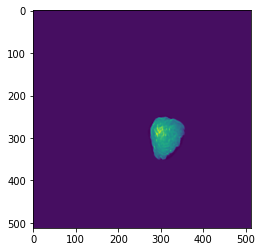

In [ ]:
plt.imshow(x.cpu().detach().numpy().reshape((512,512)))

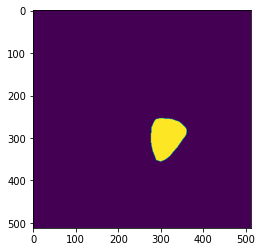

In [ ]:
plt.imshow(BrainTrainSet[31]["labels"].reshape((512,512)))

In [ ]:
 y = x.cpu().detach().numpy().reshape((512,512))

In [ ]:
## THRESHOLDING
y[y > 0.1] = 1
y[y < 0.1] = 0

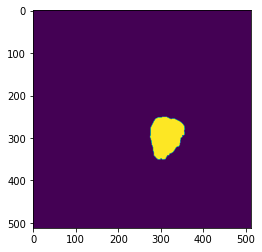

In [ ]:
plt.imshow(y)

In [ ]:
BrainTrainSet.TEST_LENGTHS

[36, 72, 47]

In [ ]:
#dice factor
def dice_coeff(pred, target, threshold=0.5, epsilon=1e-6, use_sigmoid = True):
    # make sure the tensors are align in memory and convert to probabilities if needed
    pred = pred.contiguous()
    if use_sigmoid:
        pred = torch.sigmoid(pred)
    target = target.contiguous()

    pred = (pred > threshold).float()
    intersection = (pred * target).sum(dim=2).sum(dim=2)
    dice = (2. * intersection + epsilon) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + epsilon)
    return dice.mean()

In [ ]:
for i, paths in enumerate(BrainTrainSet.test_paths):
  s = 0
  for j in range(len(paths)):
      data = BrainTrainSet.test_item(i, j)
      print(data)
      x_test, y_test = torch.Tensor(data["image"].reshape((1,1,512,512))).to(device), torch.Tensor(data["labels"]).to(device)
      output_test = model(x_test.float())
      y_test = y_test.reshape((1,1,512,512))
      s+=dice_coeff(output_test, y_test)
  print(s)

None


TypeError: ignored

In [ ]:
print(s)

tensor(37.1703, device='cuda:0')


### COMPRESSION PRUNING

In [ ]:
model = models_2.link_net(in_ch=1).to(device)
model.load_state_dict(torch.load("/content/drive/My Drive/brainnet_5_fold.pth", map_location = device))

<All keys matched successfully>

In [ ]:
import torch.nn.utils.prune as prune
count = 0
for name, module in model.named_modules():
    # prune 20% of connections in all 2D-conv layers
    if isinstance(module, torch.nn.Conv2d):
        prune.l1_unstructured(module, name='weight', amount=0.4)
        count+=1
        prune.remove(module, 'weight')
    elif isinstance(module, torch.nn.ConvTranspose2d):
        prune.l1_unstructured(module, name='weight', amount=0.2)
        count+=1
        prune.remove(module, 'weight')

In [ ]:
res = []
for i, paths in enumerate(BrainTrainSet.valid_paths):
  s = 0
  for j in range(len(paths)):
      data = BrainTrainSet.valid_item(i, j)
      x_test, y_test = torch.Tensor(data["image"].reshape((1,1,512,512))).to(device), torch.Tensor(data["labels"]).to(device)
      output_test = model(x_test.float())
      y_test = y_test.reshape((1,1,512,512))
      s+=dice_coeff(output_test, y_test)
  print(s)
  res.append(s)

val = sum(res)/sum(BrainTrainSet.VALID_LENGTHS)

tensor(33.2013)
tensor(57.2354)
tensor(42.1767)


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/brainnet_5_prune.pth')

In [ ]:
print('Size (MB):', os.path.getsize("/content/drive/My Drive/brainnet_5_fold.pth")/1e6)
print('Size (MB):', os.path.getsize("/content/drive/My Drive/brainnet_prune_f2.pth")/1e6)

Size (MB): 191.673074
Size (MB): 191.667186


In [ ]:
count

61

In [ ]:
c = 0
for i in model.named_modules():
  x=i
  if c==2:
    break
  c+=1

In [ ]:
isinstance(x[1]._mconv[0], torch.nn.Conv2d)

True

In [ ]:
model._mconv_1._mconv[0]

Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))

In [ ]:
prune.l1_unstructured(model._mconv_1._mconv[0], name='weight', amount=0.4)

In [ ]:
for i in model._mencoder_1._mres_1.named_parameters():
  print(i)

AttributeError: ignored

In [ ]:
dict(model._mencoder_1._mres_1._mconv_2._mconv.named_modules()).keys()

dict_keys(['', '0', '1'])

In [ ]:
list(dict(dict(model._mencoder_1._mres_1._mconv_2._mconv.named_modules())["0"].named_modules()).keys()) == ['']

True

In [ ]:
dict(model._mencoder_1._mres_1._mconv_2.named_modules()).keys()

dict_keys(['', '_mconv', '_mconv.0', '_mconv.1'])

In [ ]:
model._mencoder_1._mres_1._mconv_2

TypeError: ignored

In [ ]:
dict(model.named_modules()).keys()

dict_keys(['', 'quant', '_mconv_1', '_mconv_1._mconv', '_mconv_1._mconv.0', '_mconv_1._mconv.1', '_mconv_1._mconv.conv_block_relu', '_mmax_pool', '_mencoder_1', '_mencoder_1._mres_1', '_mencoder_1._mres_1._mconv_2', '_mencoder_1._mres_1._mconv_2._mconv', '_mencoder_1._mres_1._mconv_2._mconv.0', '_mencoder_1._mres_1._mconv_2._mconv.1', '_mencoder_1._mres_1._mconv_1', '_mencoder_1._mres_1._mconv_1._mconv', '_mencoder_1._mres_1._mconv_1._mconv.0', '_mencoder_1._mres_1._mconv_1._mconv.1', '_mencoder_1._mres_1._mconv_1._mconv.conv_block_relu', '_mencoder_1._mres_1._mdownsample', '_mencoder_1._mres_1._mdownsample.0', '_mencoder_1._mres_1._mdownsample.1', '_mencoder_1._mres_1._relu', '_mencoder_1._mres_2', '_mencoder_1._mres_2._mconv_2', '_mencoder_1._mres_2._mconv_2._mconv', '_mencoder_1._mres_2._mconv_2._mconv.0', '_mencoder_1._mres_2._mconv_2._mconv.1', '_mencoder_1._mres_2._mconv_1', '_mencoder_1._mres_2._mconv_1._mconv', '_mencoder_1._mres_2._mconv_1._mconv.0', '_mencoder_1._mres_2._mcon

In [ ]:
import torch.nn.utils.prune as prune
def prune_recursive(module):
  x = dict(module.named_modules())
  if list(x.keys())==[''] or not x:
    return
  for i in list(x.keys()):
    if i == '':
      continue
    if isinstance(x[i], torch.nn.Conv2d):
        prune.l1_unstructured(x[i], name='weight', amount=2)
        prune.remove(x[i], 'weight')
    else:
      prune_recursive(x[i])
  return

In [ ]:
count = 0
prune_recursive(model)

In [ ]:
n = n.split('\n')

In [ ]:
len(n)

539